In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kirisakirai","key":"b356d08cfbf91ce707ada482316e5416"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         81           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        114           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        858           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        173           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1890           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13782            True  
house-pr

In [ ]:
!kaggle datasets download -d tunguz/cryptopunks

 90% 5.00M/5.58M [00:00<00:00, 48.8MB/s]
100% 5.58M/5.58M [00:00<00:00, 50.5MB/s]


In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!unzip cryptopunks.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: imgs/imgs/550.png       
  inflating: imgs/imgs/5500.png      
  inflating: imgs/imgs/5501.png      
  inflating: imgs/imgs/5502.png      
  inflating: imgs/imgs/5503.png      
  inflating: imgs/imgs/5504.png      
  inflating: imgs/imgs/5505.png      
  inflating: imgs/imgs/5506.png      
  inflating: imgs/imgs/5507.png      
  inflating: imgs/imgs/5508.png      
  inflating: imgs/imgs/5509.png      
  inflating: imgs/imgs/551.png       
  inflating: imgs/imgs/5510.png      
  inflating: imgs/imgs/5511.png      
  inflating: imgs/imgs/5512.png      
  inflating: imgs/imgs/5513.png      
  inflating: imgs/imgs/5514.png      
  inflating: imgs/imgs/5515.png      
  inflating: imgs/imgs/5516.png      
  inflating: imgs/imgs/5517.png      
  inflating: imgs/imgs/5518.png      
  inflating: imgs/imgs/5519.png      
  inflating: imgs/imgs/552.png       
  inflating: imgs/imgs/5520.png      
  inflating: imgs/imgs/5521.png      
  inflating: i

In [ ]:
!ls

cryptopunks.zip  imgs  kaggle.json  sample_data  txn_history-2021-10-07.jsonl


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import random
from tqdm import tqdm
import cv2 as cv
import PIL
from PIL import Image
import plotly.express as px
from IPython import display
import tensorflow as tf
from tensorflow import keras

In [ ]:
import torch
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
base_dir = 'input/cryptopunks/'
os.listdir(base_dir)

['sample_data', 'txn_history-2021-10-07.jsonl', 'imgs']

In [ ]:
data_dir='input/cryptopunks/txn_history-2021-10-07.jsonl'
image_dir='input/cryptopunks/imgs/imgs'
image_root='input/cryptopunks/imgs'

In [ ]:
df = pd.read_json(base_dir + 'txn_history-2021-10-07.jsonl', lines=True)
df.head()

txn_type      from  ...      type                              accessories
0  Bid Withdrawn  0xe73a1d  ...  [Female]  [Green Eye Shadow, Earring, Blonde Bob]
1            Bid  0xe73a1d  ...  [Female]  [Green Eye Shadow, Earring, Blonde Bob]
2  Bid Withdrawn  0x2e5e22  ...  [Female]  [Green Eye Shadow, Earring, Blonde Bob]
3            Bid  0x2e5e22  ...  [Female]  [Green Eye Shadow, Earring, Blonde Bob]
4  Bid Withdrawn  0x2e5e22  ...  [Female]  [Green Eye Shadow, Earring, Blonde Bob]

[5 rows x 12 columns]

Sample 100 CryptoPunks


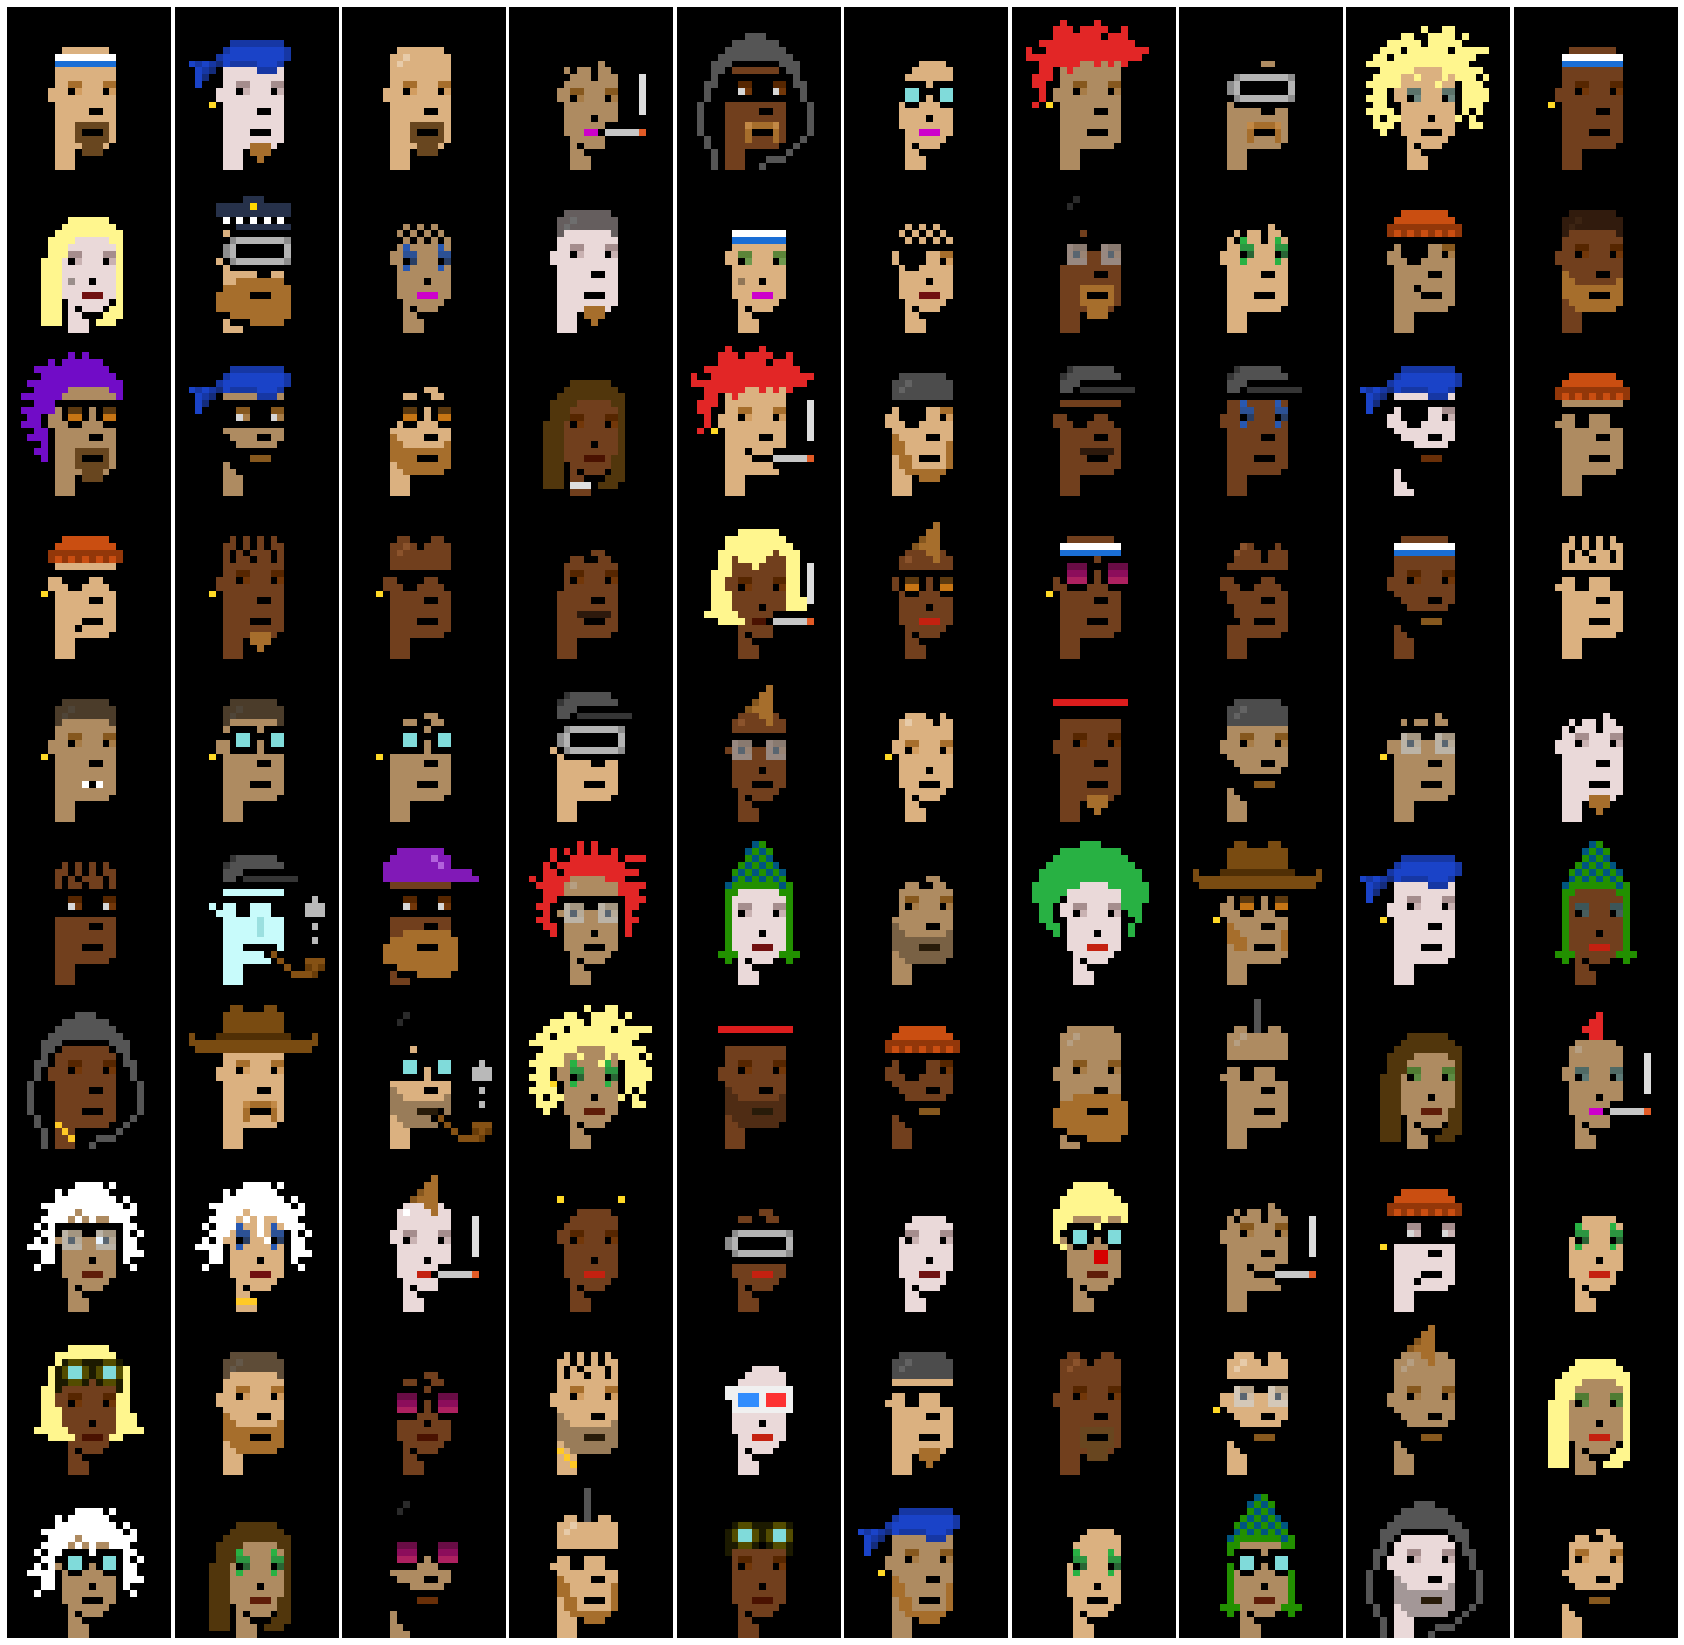

In [ ]:
no_plots=10*10

images=glob.glob("input/cryptopunks/imgs/imgs/*.png")

plt.rcParams['figure.figsize']=(30,30)
plt.subplots_adjust(wspace=0,hspace=0)

print("Sample 100 CryptoPunks")
for idx,image in enumerate(images[:no_plots]):
    sample_img=cv.imread(image)
    plt.subplot(10,10,idx+1)
    plt.axis('off')
    plt.imshow(cv.cvtColor(sample_img,cv.COLOR_BGR2RGB))

plt.show()

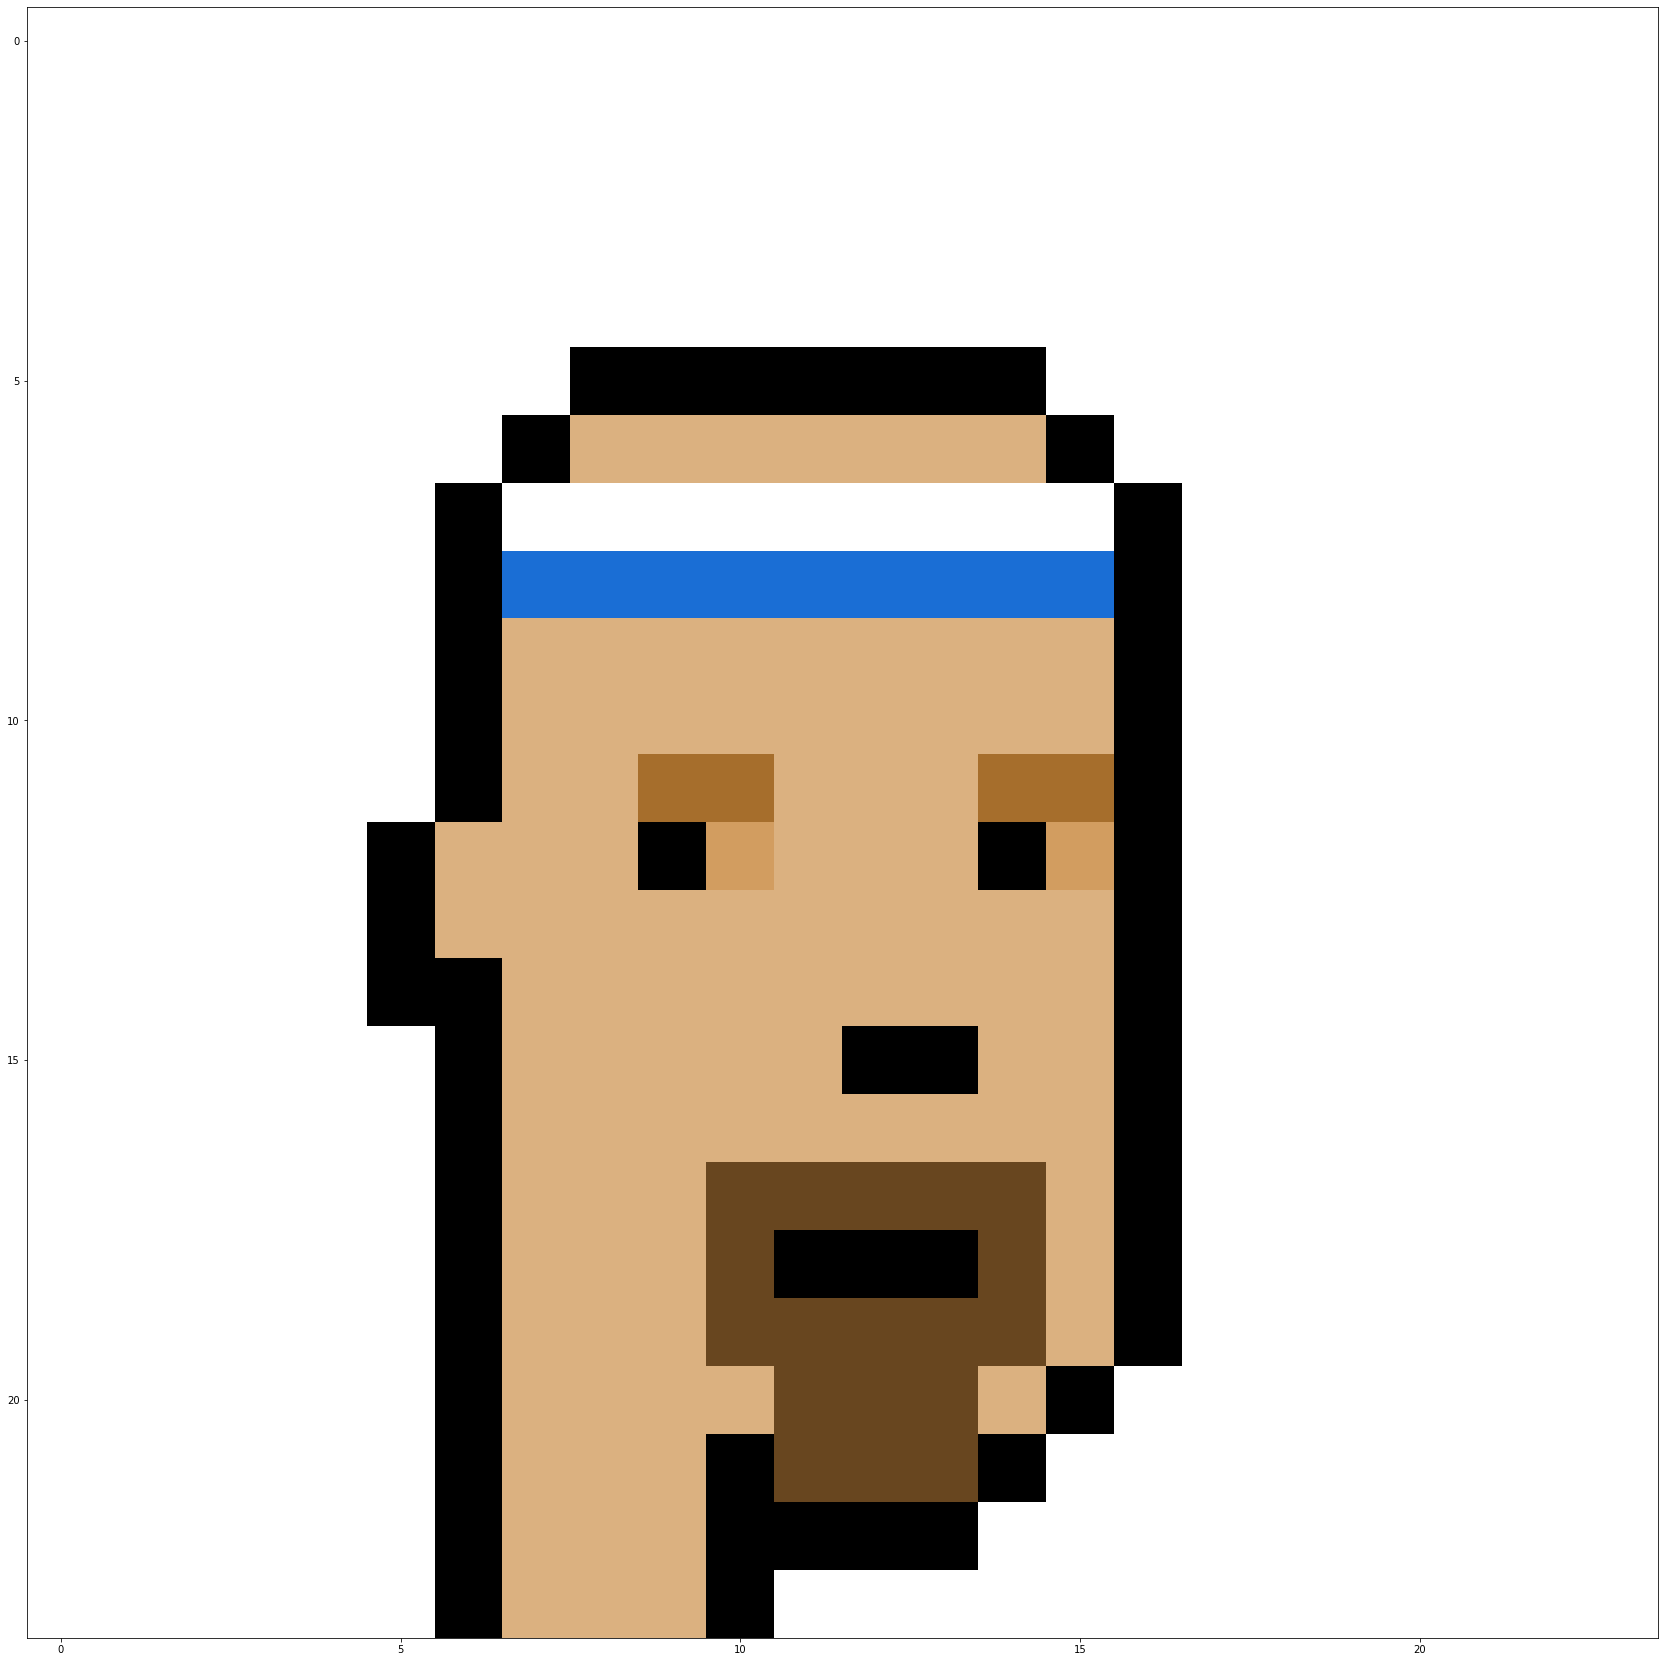

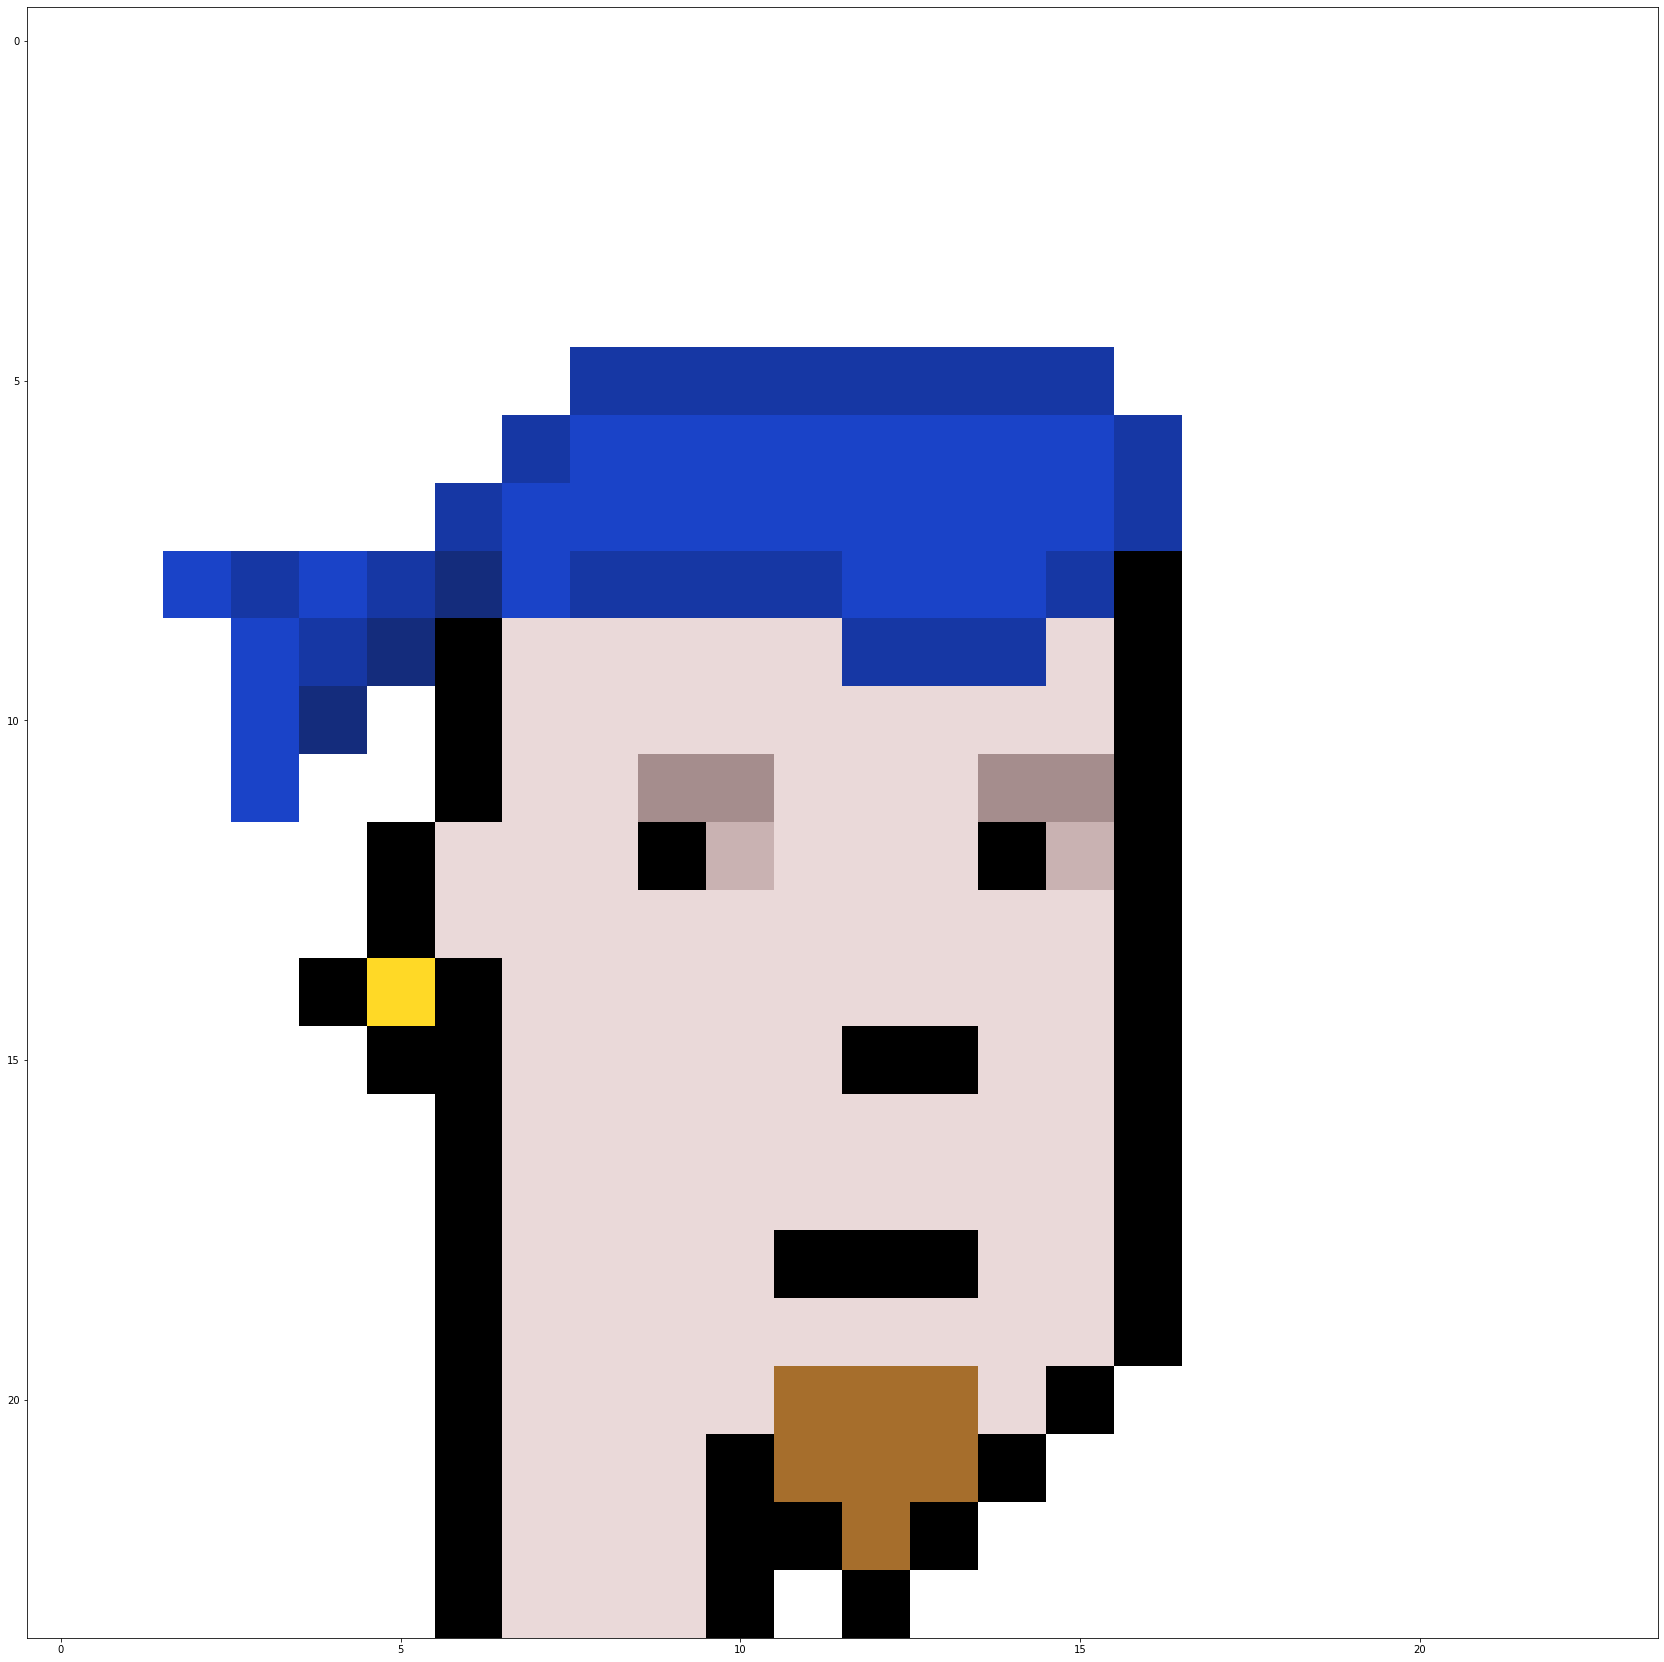

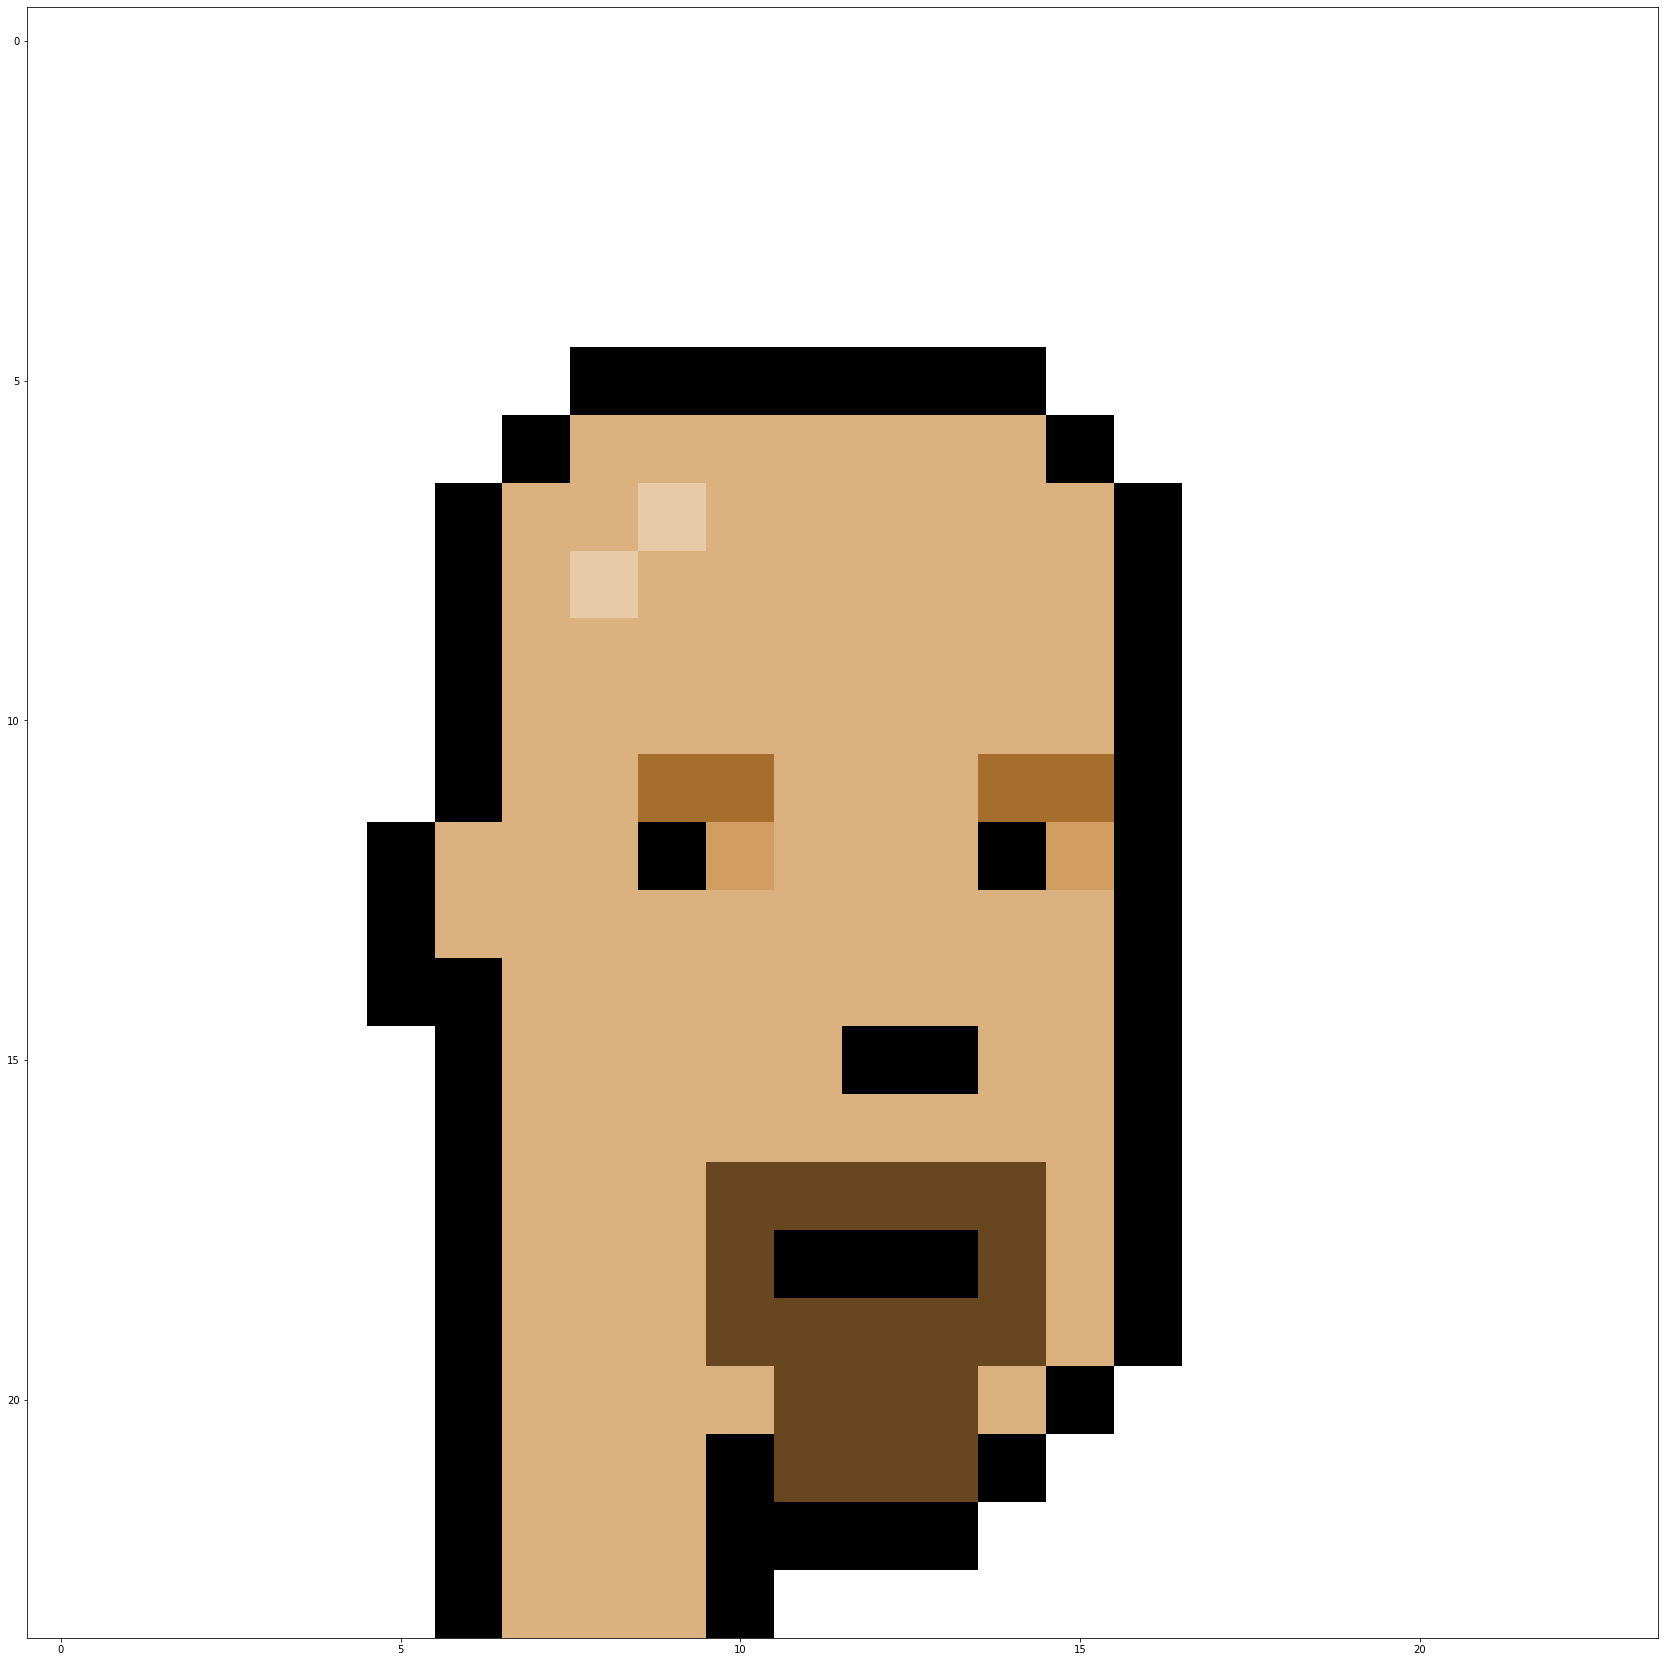

In [ ]:
punks=[img for img in glob.glob("input/cryptopunks/imgs/imgs/*png")]
for punk in punks[0:3]:
  img=plt.imread(punk)
  plt.imshow(img)
  plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167492 entries, 0 to 167491
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   txn_type             167492 non-null  object        
 1   from                 167492 non-null  object        
 2   to                   167492 non-null  object        
 3   date                 167492 non-null  datetime64[ns]
 4   timestamp            167492 non-null  datetime64[ns]
 5   source               167492 non-null  object        
 6   eth                  127542 non-null  float64       
 7   punk_id              167492 non-null  int64         
 8   from_wallet_address  419 non-null     object        
 9   to_wallet_address    419 non-null     object        
 10  type                 167492 non-null  object        
 11  accessories          167492 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 15.3

In [ ]:
df=df[["txn_type","date","eth","punk_id","type","accessories"]]
df.head()

txn_type       date  ...      type                              accessories
0  Bid Withdrawn 2021-09-04  ...  [Female]  [Green Eye Shadow, Earring, Blonde Bob]
1            Bid 2021-09-01  ...  [Female]  [Green Eye Shadow, Earring, Blonde Bob]
2  Bid Withdrawn 2021-09-01  ...  [Female]  [Green Eye Shadow, Earring, Blonde Bob]
3            Bid 2021-09-01  ...  [Female]  [Green Eye Shadow, Earring, Blonde Bob]
4  Bid Withdrawn 2021-09-01  ...  [Female]  [Green Eye Shadow, Earring, Blonde Bob]

[5 rows x 6 columns]

In [ ]:
df['txn_type'].unique()

array(['Bid Withdrawn', 'Bid', 'Sold', 'Offered', 'Transfer', 'Claimed',
       'Offer Withdrawn', '(Wrap)', '(Unwrap)'], dtype=object)

In [ ]:
df['accessories'].explode().unique()

array(['Green Eye Shadow', 'Earring', 'Blonde Bob', 'Smile', 'Mohawk',
       'Wild Hair', 'Nerd Glasses', 'Pipe', 'Big Shades', 'Goat',
       'Purple Eye Shadow', 'Half Shaved', 'Do-rag', 'Wild White Hair',
       'Spots', 'Clown Eyes Blue', 'Messy Hair', 'Luxurious Beard',
       'Clown Nose', 'Police Cap', 'Big Beard', 'Blue Eye Shadow',
       'Black Lipstick', 'Clown Eyes Green', 'Straight Hair Dark',
       'Blonde Short', 'Purple Lipstick', 'Straight Hair Blonde',
       'Pilot Helmet', 'Hot Lipstick', 'Regular Shades', 'Stringy Hair',
       'Small Shades', 'Frown', 'Eye Mask', 'Muttonchops', 'Bandana',
       'Horned Rim Glasses', 'Crazy Hair', 'Classic Shades', 'Handlebars',
       'Mohawk Dark', 'Dark Hair', 'Peak Spike', 'Normal Beard Black',
       'Cap', 'VR', 'Frumpy Hair', 'Cigarette', 'Normal Beard',
       'Red Mohawk', 'Shaved Head', 'Chinstrap', 'Mole', 'Knitted Cap',
       'Fedora', 'Shadow Beard', 'Straight Hair', 'Hoodie', 'Eye Patch',
       'Headband', 'Cowbo

In [ ]:
len(df['accessories'].explode().unique())

88

In [ ]:
df=df.explode("type")
df.head()

txn_type       date  ...    type                              accessories
0  Bid Withdrawn 2021-09-04  ...  Female  [Green Eye Shadow, Earring, Blonde Bob]
1            Bid 2021-09-01  ...  Female  [Green Eye Shadow, Earring, Blonde Bob]
2  Bid Withdrawn 2021-09-01  ...  Female  [Green Eye Shadow, Earring, Blonde Bob]
3            Bid 2021-09-01  ...  Female  [Green Eye Shadow, Earring, Blonde Bob]
4  Bid Withdrawn 2021-09-01  ...  Female  [Green Eye Shadow, Earring, Blonde Bob]

[5 rows x 6 columns]

In [ ]:
fig=px.bar(df[df.txn_type=='Sold'].groupby("type").agg({"eth":"max"}).sort_values(by="eth").
           reset_index('type'),x="type",y="eth",color="type",title="CryptoPunk Types vs. Price")
fig.show()

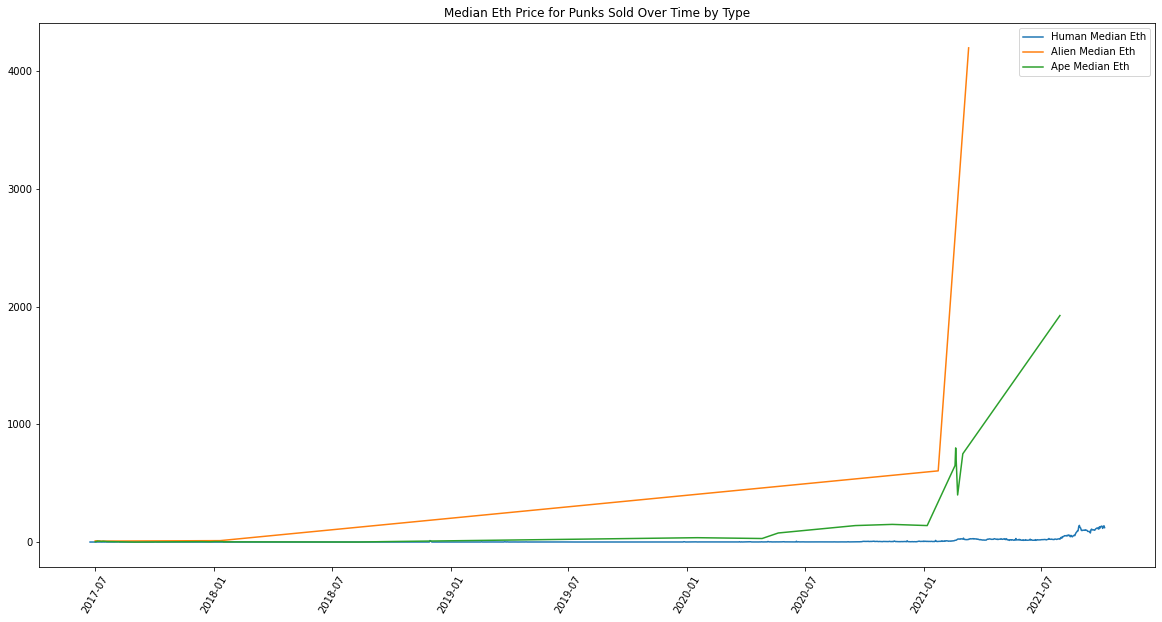

In [ ]:
human=df[(df.txn_type=='Sold')&((df.type=="Female")|(df.type=="Male"))].groupby("date").agg({"eth":["median"]}).reset_index("date")

alien=df[(df.txn_type=='Sold')&((df.type=="Alien"))].groupby("date").agg({"eth":["median"]}).reset_index("date")

zombie=df[(df.txn_type=='Sold')&((df.type=="Zombie"))].groupby("date").agg({"eth":["median"]}).reset_index("date")

ape=df[(df.txn_type=='Sold')&((df.type=="Ape"))].groupby("date").agg({"eth":["median"]}).reset_index("date")


plt.figure(figsize=(20,10))
plt.plot(human['date'],
         human['eth']['median'],
         label="Human Median Eth")

plt.plot(alien['date'],
         alien['eth']['median'],
         label="Alien Median Eth")

plt.plot(ape['date'],
         ape['eth']['median'],
         label="Ape Median Eth")
plt.legend()
plt.xticks(rotation=60)
plt.title("Median Eth Price for Punks Sold Over Time by Type")
plt.show()

In [ ]:
df['num_attributes']=df.accessories.apply(lambda x:len(x))

In [ ]:
fig=px.bar(df[(df.txn_type=="Sold")&((df.type=="Female")|(df.type=="Male"))].groupby("num_attributes").agg({"eth":"mean"}).reset_index("num_attributes"),
           x="num_attributes",y="eth",color="eth",title="CryptoPunk Price per Number of Attributes of Human Punks")
fig.show()

In [ ]:
fig=px.bar(df[(df.txn_type=="Sold")&((df.type=="Alien"))].groupby("num_attributes").agg({"eth":"mean"}).reset_index("num_attributes"),
              x="num_attributes",y="eth",color="eth",title="CryptoPunk Price per Number of Attributes of Alien Punks")
fig.show()

In [ ]:
fig=px.bar(df[(df.txn_type=="Sold")&((df.type=="Zombie"))].groupby("num_attributes").agg({"eth":"mean"}).reset_index("num_attributes"),
           x="num_attributes",y="eth",color="eth",title="CryptoPunk Price per Number of Attributes of Zombie Punks")
fig.show()

In [ ]:
fig=px.bar(df[(df.txn_type=="Sold")&((df.type=="Ape"))].groupby("num_attributes").agg({"eth":"mean"}).reset_index("num_attributes"),
           x="num_attributes",y="eth",color="eth",title="CryptoPunk Price per Number of Attributes of Ape Punks")
fig.show()

In [ ]:
def tensor_imshow(img,dnorm=True):
  img=img.to('cpu')
  npimg=img.detach().numpy()
  if dnorm:
    npimg=npimg*0.5+0.5
  plt.figure(figsize=(3,3))
  plt.axis('off')
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

In [ ]:
def get_dataloader(batch_size,
                   image_size,
                   data_dir=image_dir,
                   num_workers=3):
  stats=(0.5,0.5,0.5),(0.5,0.5,0.5)
  transform=transforms.Compose([transforms.Resize((image_size,image_size)),
                                   transforms.ToTensor(),
                                   transforms.Normalize(*stats)])
  dataset=datasets.ImageFolder(root=data_dir,
                               transform=transform)
  data_loader=torch.utils.data.DataLoader(dataset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=num_workers,
                                          pin_memory=True)
  return data_loader

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



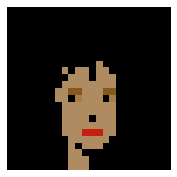

In [ ]:
batch_size,image_size=5,24
train_loader=get_dataloader(batch_size,image_size,image_root)
dataiter=iter(train_loader)
img,_=next(dataiter)
sample_img=img[-1]

tensor_imshow(sample_img)

In [ ]:
class Generator(nn.Module):
  def __init__(self,z_dim=100,im_chan=3,hidden_dim=64):
    super(Generator,self).__init__()
    self.z_dim=z_dim
    self.im_chan=im_chan
    self.hidden_dim=hidden_dim

    self.generator_cnn=nn.Sequential(self.make_gen_block(z_dim,hidden_dim*8,stride=1,padding=0),
                                     self.make_gen_block(hidden_dim*8,hidden_dim*4),
                                     self.make_gen_block(hidden_dim*4,hidden_dim*2),
                                     self.make_gen_block(hidden_dim*2,hidden_dim),
                                     self.make_gen_block(hidden_dim,im_chan,final_layer=True))
  def make_gen_block(self,
                     im_chan,
                     op_chan,
                     kernel_size=4,
                     stride=2,
                     padding=1,
                     final_layer=False):
    layers=[]
    layers.append(nn.ConvTranspose2d(im_chan,
                                     op_chan,
                                     kernel_size,
                                     stride,
                                     padding,
                                     bias=False))
    if not final_layer:
      layers.append(nn.BatchNorm2d(op_chan))
      layers.append(nn.LeakyReLU(0.2))
    else:
      layers.append(nn.Tanh())

    return nn.Sequential(*layers)

  def forward(self,noise):
    x=noise.view(-1,self.z_dim,1,1)
    return self.generator_cnn(x)

  def get_noise(n_samples,
                z_dim,
                device='cpu'):
    return torch.randn(n_samples,
                       z_dim,
                       device=device)

In [ ]:
noise=Generator.get_noise(n_samples=5,
                          z_dim=100)
g=Generator(z_dim=100,
            im_chan=3,
            hidden_dim=64)

In [ ]:
print(g)

Generator(
  (generator_cnn): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

In [ ]:
class Discriminator(nn.Module):
  def __init__(self,
               im_chan=3,
               conv_dim=64,
               image_size=64):
    super(Discriminator, self).__init__()
    self.image_size=image_size
    self.conv_dim=conv_dim

    self.disc_cnn=nn.Sequential(self.make_disc_block(im_chan,conv_dim),
                                self.make_disc_block(conv_dim, conv_dim*2),
                                self.make_disc_block(conv_dim*2,conv_dim*4),
                                self.make_disc_block(conv_dim*4,conv_dim*8),
                                self.make_disc_block(conv_dim*8,1,padding=0,final_layer=True))
  def make_disc_block(self,
                      im_chan,
                      op_chan,
                      kernel_size=4,
                      stride=2,
                      padding=1,
                      final_layer=False):
    layers=[]
    layers.append(nn.Conv2d(im_chan,
                            op_chan,
                            kernel_size,
                            stride,
                            padding,
                            bias=False))
    if not final_layer:
      layers.append(nn.BatchNorm2d(op_chan))
      layers.append(nn.LeakyReLU(0.2,inplace=True))
    return nn.Sequential(*layers)

  def forward(self, image):
    pred=self.disc_cnn(image)
    pred=pred.view(image.size(0),-1)
    return pred
  def _get_final_feature_dimention(self):
    final_width_height=(self,image_size//2**len(self.disc_cnn))**2
    final_depth=self.conv_dim*2**(len(self.disc_cnn)-1)
    return final_depth*final_width_height


In [ ]:
d=Discriminator(im_chan=3,
                conv_dim=64,
                image_size=64)

In [ ]:
def weights_init_normal(m):
  if isinstance(m,nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
    torch.nn.init.normal_(m.weight,0.0,0.02)
  if isinstance(m,nn.BatchNorm2d):
    torch.nn.init.normal_(m.weight,0.0,0.02)
    torch.nn.init.constant_(m.bias,0)

In [ ]:
def real_loss(D_out,device='cpu'):
  criterion=nn.BCEWithLogitsLoss()

  batch_size=D_out.size(0)

  labels=torch.ones(batch_size,device=device)*0.9
  loss=criterion(D_out.squeeze(),labels)
  return loss

In [ ]:
def fake_loss(D_out,device='cpu'):
  criterion=nn.BCEWithLogitsLoss()

  batch_size=D_out.size(0)
  labels=torch.zeros(batch_size,
                     device=device)

  loss=criterion(D_out.squeeze(),labels)
  return loss

In [ ]:
def print_tensor_images(images_tensor):
  plt.rcParams['figure.figsize']=(15,15)
  plt.subplots_adjust(wspace=0,hspace=0)

  images_tensor=images_tensor.to('cpu')
  npimgs=images_tensor.detach().numpy()

  no_plots=len(images_tensor)

  for idx,image in enumerate(npimgs):
    plt.subplot(1,8,idx+1)
    plt.axis('off')

    image=image*0.5+0.5
    plt.imshow(np.transpose(image,(1,2,0)))

  plt.show()

In [ ]:
def train(D,G,
          n_epochs,
          dataloader,
          d_potimizer,
          g_optimizer,
          z_dim,
          print_every=50,
          device='cpu'):
  sample_size=8
  fixed_z=Generator.get_noise(n_samples=sample_size,
                              z_dim=z_dim,
                              device=device)
  for epoch in range(1,n_epochs+1):
    for batch_i,(real_images,_)in enumerate(dataloader):
      batch_size=real_images.size(0)
      real_images=real_images.to(device)

      d_optimizer.zero_grad()
      d_real_op=D(real_images)
      d_real_loss=real_loss(d_real_op,
                            device=device)
      noise=Generator.get_noise(n_samples=batch_size,
                                z_dim=z_dim,
                                device=device)
      fake_images=G(noise)

      d_fake_op=D(fake_images)
      d_fake_loss=fake_loss(d_fake_op,
                            device=device)
      d_loss=d_real_loss+d_fake_loss
      d_loss.backward()
      d_optimizer.step()

      g_optimizer.zero_grad()
      noise=Generator.get_noise(n_samples=batch_size,
                                z_dim=z_dim,
                                device=device)
      g_out=G(noise)
      d_out=D(g_out)

      g_loss=real_loss(d_out,device=device)

      g_loss.backward()
      g_optimizer.step()
    print('Epoch [{:5d}/{:5d}]|d_loss:{:6.4f}|g_loss:{:6.4f}'.format(epoch,
                                                                     n_epochs,
                                                                     d_loss.item(),
                                                                     g_loss.item()))
    if(epoch % print_every==0):
      G.eval()
      sample_image=G(fixed_z)
      print_tensor_images(sample_image)
      G.train()

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
print("Device is", device)

z_dim=100
beta_1=0.5
beta_2=0.999
lr=0.0002
n_epochs=100
batch_size=128
image_size=64

Device is cuda


In [ ]:
generator = Generator(z_dim,
                      im_chan=3,
                      hidden_dim=64).to(device)
discriminator=Discriminator(im_chan=3,
                            conv_dim=64,
                            image_size=image_size).to(device)
g_optimizer=optim.Adam(generator.parameters(),
                       lr=lr,
                       betas=(beta_1,beta_2))
d_optimizer=optim.Adam(discriminator.parameters(),
                       lr=lr,
                       betas=(beta_1,beta_2))
dataloader=get_dataloader(batch_size,
                          image_size,
                          image_root)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Epoch [    1/  100]|d_loss:0.3311|g_loss:6.1461
Epoch [    2/  100]|d_loss:0.6316|g_loss:0.7841
Epoch [    3/  100]|d_loss:1.0785|g_loss:9.3439
Epoch [    4/  100]|d_loss:0.4815|g_loss:3.0097
Epoch [    5/  100]|d_loss:0.7025|g_loss:5.6197
Epoch [    6/  100]|d_loss:0.6229|g_loss:1.6868
Epoch [    7/  100]|d_loss:0.4693|g_loss:3.1294
Epoch [    8/  100]|d_loss:0.4579|g_loss:2.5380
Epoch [    9/  100]|d_loss:0.5096|g_loss:3.0224
Epoch [   10/  100]|d_loss:0.8903|g_loss:0.4426


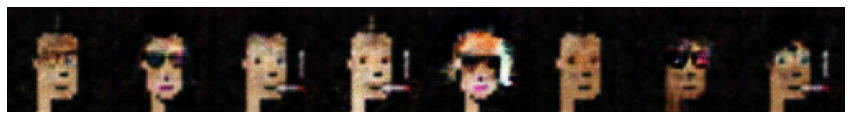

Epoch [   11/  100]|d_loss:0.4776|g_loss:3.0686
Epoch [   12/  100]|d_loss:0.5407|g_loss:4.0313
Epoch [   13/  100]|d_loss:0.3668|g_loss:5.3334
Epoch [   14/  100]|d_loss:0.4224|g_loss:4.1377
Epoch [   15/  100]|d_loss:0.3731|g_loss:3.7070
Epoch [   16/  100]|d_loss:0.3432|g_loss:2.7878
Epoch [   17/  100]|d_loss:0.4064|g_loss:4.7569
Epoch [   18/  100]|d_loss:0.4237|g_loss:3.5829
Epoch [   19/  100]|d_loss:1.2751|g_loss:0.4151
Epoch [   20/  100]|d_loss:0.4306|g_loss:2.5411


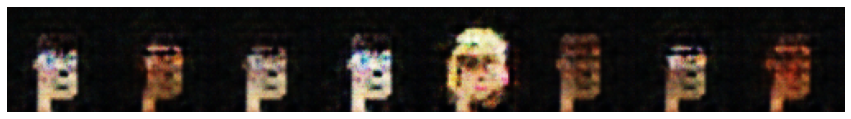

Epoch [   21/  100]|d_loss:0.5617|g_loss:5.4016
Epoch [   22/  100]|d_loss:0.3808|g_loss:3.2683
Epoch [   23/  100]|d_loss:0.3400|g_loss:5.2712
Epoch [   24/  100]|d_loss:0.4051|g_loss:2.3657
Epoch [   25/  100]|d_loss:0.4648|g_loss:2.3816
Epoch [   26/  100]|d_loss:0.4099|g_loss:5.3418
Epoch [   27/  100]|d_loss:0.4974|g_loss:4.0312
Epoch [   28/  100]|d_loss:0.3820|g_loss:3.9064
Epoch [   29/  100]|d_loss:0.6039|g_loss:2.5370
Epoch [   30/  100]|d_loss:0.3846|g_loss:3.5661


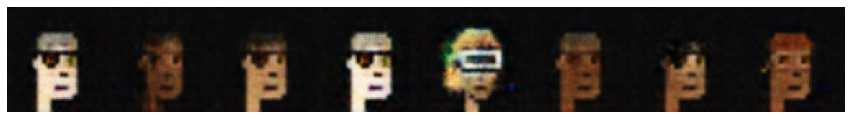

Epoch [   31/  100]|d_loss:0.4202|g_loss:1.9195
Epoch [   32/  100]|d_loss:0.3553|g_loss:5.7332
Epoch [   33/  100]|d_loss:0.4781|g_loss:4.6989
Epoch [   34/  100]|d_loss:0.8332|g_loss:2.8972
Epoch [   35/  100]|d_loss:0.5120|g_loss:3.2343
Epoch [   36/  100]|d_loss:0.5967|g_loss:1.0397
Epoch [   37/  100]|d_loss:0.4491|g_loss:2.7987
Epoch [   38/  100]|d_loss:0.3487|g_loss:5.2929
Epoch [   39/  100]|d_loss:0.4000|g_loss:4.9093
Epoch [   40/  100]|d_loss:0.4559|g_loss:1.1794


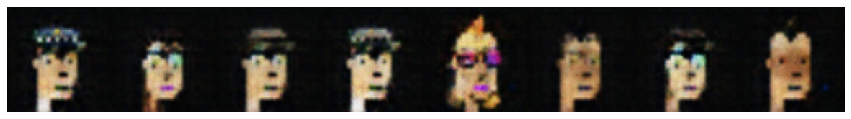

Epoch [   41/  100]|d_loss:0.3475|g_loss:5.1244
Epoch [   42/  100]|d_loss:0.5416|g_loss:2.0308
Epoch [   43/  100]|d_loss:0.4542|g_loss:5.2381
Epoch [   44/  100]|d_loss:2.6978|g_loss:1.1405
Epoch [   45/  100]|d_loss:0.4773|g_loss:0.9561
Epoch [   46/  100]|d_loss:0.3906|g_loss:3.9092
Epoch [   47/  100]|d_loss:0.8927|g_loss:1.4066
Epoch [   48/  100]|d_loss:0.3537|g_loss:3.0034
Epoch [   49/  100]|d_loss:0.3486|g_loss:6.3460
Epoch [   50/  100]|d_loss:0.3342|g_loss:7.0664


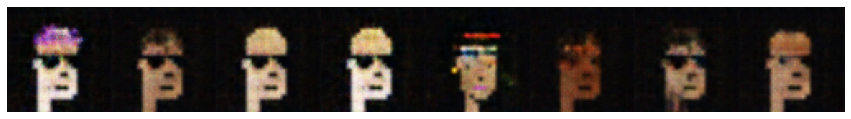

Epoch [   51/  100]|d_loss:0.3535|g_loss:5.3419
Epoch [   52/  100]|d_loss:0.9797|g_loss:0.7185
Epoch [   53/  100]|d_loss:0.3447|g_loss:4.6053
Epoch [   54/  100]|d_loss:0.3984|g_loss:3.1313
Epoch [   55/  100]|d_loss:0.8715|g_loss:1.5930
Epoch [   56/  100]|d_loss:0.6645|g_loss:1.5156
Epoch [   57/  100]|d_loss:0.3734|g_loss:5.9786
Epoch [   58/  100]|d_loss:0.9866|g_loss:0.8007
Epoch [   59/  100]|d_loss:0.4364|g_loss:3.0289
Epoch [   60/  100]|d_loss:0.5821|g_loss:1.7487


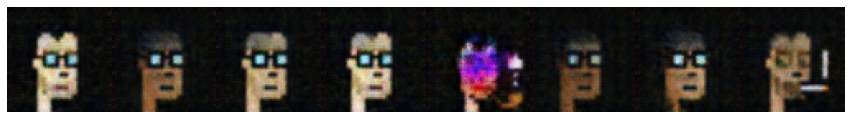

Epoch [   61/  100]|d_loss:0.3413|g_loss:5.7040
Epoch [   62/  100]|d_loss:0.8627|g_loss:1.4834
Epoch [   63/  100]|d_loss:0.6107|g_loss:0.9259
Epoch [   64/  100]|d_loss:0.9940|g_loss:0.6210
Epoch [   65/  100]|d_loss:0.5119|g_loss:2.0028
Epoch [   66/  100]|d_loss:0.3732|g_loss:3.3479
Epoch [   67/  100]|d_loss:0.3998|g_loss:3.4679
Epoch [   68/  100]|d_loss:0.3324|g_loss:5.3350
Epoch [   69/  100]|d_loss:0.3430|g_loss:7.7434
Epoch [   70/  100]|d_loss:0.3680|g_loss:5.3445


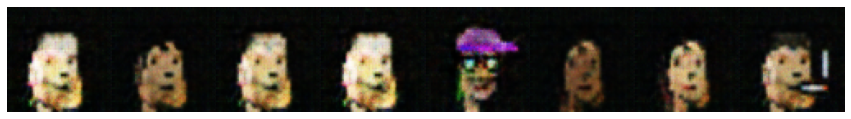

Epoch [   71/  100]|d_loss:0.4895|g_loss:3.8597
Epoch [   72/  100]|d_loss:0.3451|g_loss:4.3768
Epoch [   73/  100]|d_loss:1.4933|g_loss:0.5057
Epoch [   74/  100]|d_loss:0.3413|g_loss:4.2305
Epoch [   75/  100]|d_loss:0.3971|g_loss:3.3491
Epoch [   76/  100]|d_loss:0.3593|g_loss:4.8050
Epoch [   77/  100]|d_loss:0.4624|g_loss:2.9046
Epoch [   78/  100]|d_loss:0.5811|g_loss:1.8276
Epoch [   79/  100]|d_loss:0.3908|g_loss:4.6948
Epoch [   80/  100]|d_loss:0.5232|g_loss:2.7053


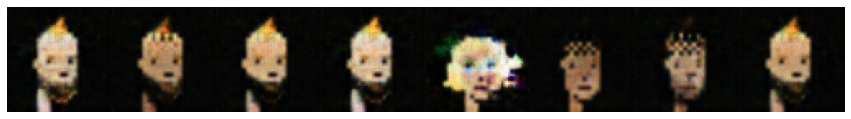

Epoch [   81/  100]|d_loss:0.4557|g_loss:6.1988
Epoch [   82/  100]|d_loss:0.7163|g_loss:1.6217
Epoch [   83/  100]|d_loss:0.9653|g_loss:0.7686
Epoch [   84/  100]|d_loss:1.0806|g_loss:0.8438
Epoch [   85/  100]|d_loss:0.3506|g_loss:5.7911
Epoch [   86/  100]|d_loss:0.4241|g_loss:3.5125
Epoch [   87/  100]|d_loss:2.4187|g_loss:0.3581
Epoch [   88/  100]|d_loss:0.4118|g_loss:4.8837
Epoch [   89/  100]|d_loss:0.3398|g_loss:4.1656
Epoch [   90/  100]|d_loss:0.3706|g_loss:5.4141


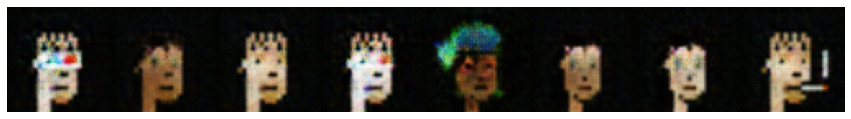

Epoch [   91/  100]|d_loss:0.5123|g_loss:2.1137
Epoch [   92/  100]|d_loss:0.6347|g_loss:1.5430
Epoch [   93/  100]|d_loss:0.4819|g_loss:2.6535
Epoch [   94/  100]|d_loss:0.4912|g_loss:1.9127
Epoch [   95/  100]|d_loss:0.3539|g_loss:4.7230
Epoch [   96/  100]|d_loss:0.7283|g_loss:1.7448
Epoch [   97/  100]|d_loss:2.8763|g_loss:0.6285
Epoch [   98/  100]|d_loss:0.4743|g_loss:2.2154
Epoch [   99/  100]|d_loss:1.6044|g_loss:0.7907
Epoch [  100/  100]|d_loss:0.5959|g_loss:2.8683


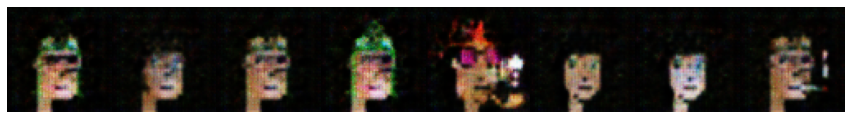

In [ ]:
%time
n_epochs=100
train(discriminator,
      generator,
      n_epochs,
      dataloader,
      d_optimizer,
      g_optimizer,
      z_dim,
      print_every=10,
      device=device)

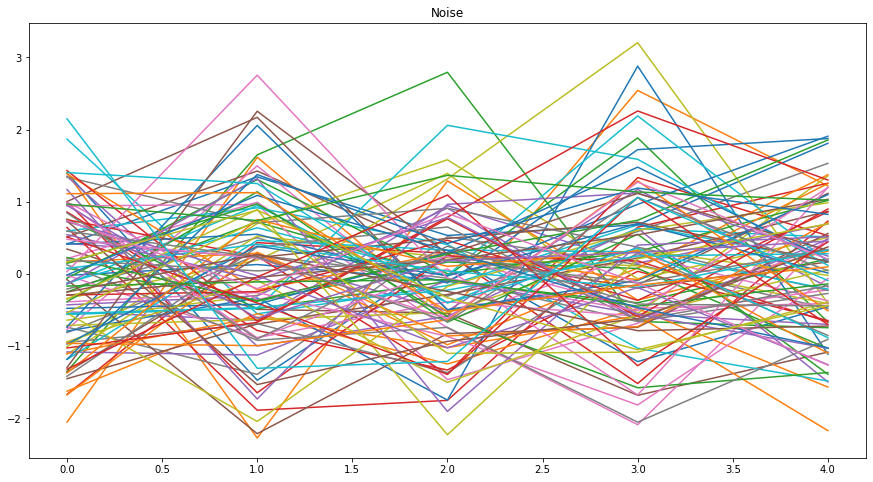

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(noise)
plt.title("Noise")
plt.show()

In [ ]:
def save_model(generator,file_name):
  generator=generator.to('cuda')
  torch.save(generator.state_dict(),"cryptopunks_generator.pth")
save_model(generator,"kaggle")

In [ ]:
generator.to(device)
generator.eval()
sample_size=8

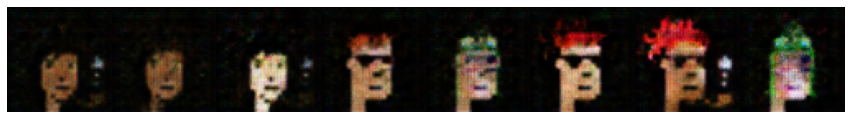

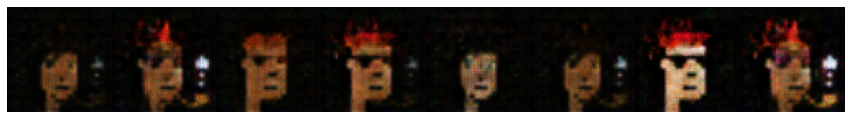

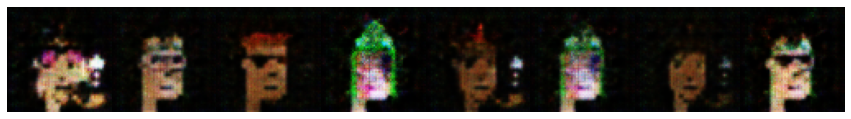

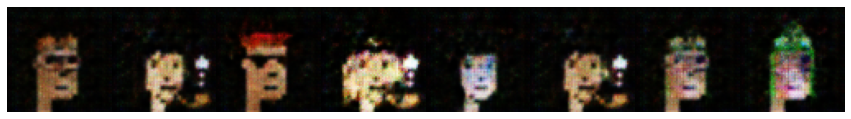

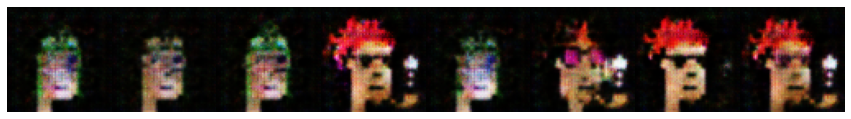

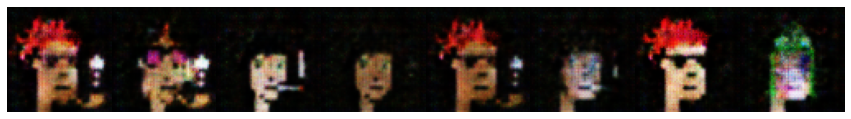

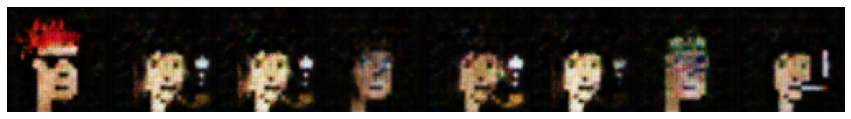

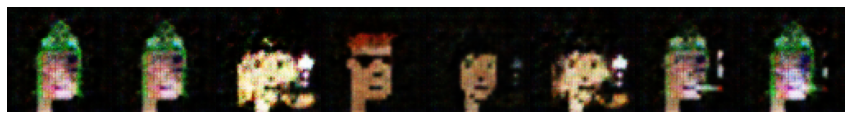

In [ ]:
for i in range(8):
  fixed_z=Generator.get_noise(n_samples=sample_size,
                              z_dim=z_dim,
                              device=device)

  sample_image=generator(fixed_z)

  print_tensor_images(sample_image)

In [ ]:
!kaggle datasets download -d stanleyjzheng/bored-apes-yacht-club

100% 1.35G/1.35G [00:12<00:00, 187MB/s]
100% 1.35G/1.35G [00:12<00:00, 117MB/s]


In [ ]:
!unzip bored-apes-yacht-club.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: bayc/QmWvuooF5A8hAFjEvWeqjCqGKqHTRJZmyoE6WDB31RRkwq.png  
  inflating: bayc/QmWvx6uZWQ2BWaJcj3AHxtSFWMuYQC9oxZAb2oAwDaX5J5.png  
  inflating: bayc/QmWvxqQA4XFYCqS9STe6wvN57Uau8W52gCjHuye96LoLLT.png  
  inflating: bayc/QmWwAg2WiKE9wF9eQmdhr52P75B8U1BUMCPQu5dgyTZVLH.png  
  inflating: bayc/QmWwDkaunyueF9cKdGsZVpURVHr48xN7hqjUbdFCVEENg9.png  
  inflating: bayc/QmWwQLNxSEsJ6Pr1sdFhWxEjRTRKhCKwBoZJJVpzNNmxmo.png  
  inflating: bayc/QmWwWncDDAuCXghfYQjAuBHYqoY8jR8jTXY1d9SKunT52j.png  
  inflating: bayc/QmWwjWgJG1zJd7LeM5K8H4ADwywurxnjTa8nkAKE3WdHww.png  
  inflating: bayc/QmWwm65c8P3UyCrjYSLaDPSQhZB3WeuySJCQNEgsgXhwPq.png  
  inflating: bayc/QmWwmVb9deB13N6e5oa6eaJe98KFthcV225sN2TxVZEJ5s.png  
  inflating: bayc/QmWwneZTsVjfQ5z1GZKQSQ4F5z1BbVFe1XCc75vFRLRcjZ.png  
  inflating: bayc/QmWwq9P8oxsyh8eP2zuLscQF6YoTWLeGNLoV9Dfm9k6tV7.png  
  inflating: bayc/QmWwrez38SYEgKcSzsiQzB7T5geDjrgyi7g7iepftoCRRS.png  
  inflating: bayc/QmWwtBEyybctoSPbgWNhKog

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import random
from tqdm import tqdm
import cv2 as cv
import PIL
import plotly.express as px
from IPython import display

import tensorflow as tf
from tensorflow import keras

import torch
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.cuda.empty_cache()

In [ ]:
base_dir="input/bored-apes-yacht-club/bayc"

In [ ]:
image_dir="input/bored-apes-yacht-club/bayc"
image_root="input/bored-apes-yacht-club"

In [ ]:
no_plots=10*10

images=glob.glob("input/bored-apes-yacht-club/bayc/*.png")

plt.rcParams['figure.figsize']=(30,30)
plt.subplots_adjust(wspace=0,hspace=0)

print("Sample 100 Bored Apes")
for idx,image in enumerate(images[:no_plots]):
  sample_img=cv.imread(image)
  plt.subplot(10,10,idx+1)
  plt.axis('off')
  plt.imshow(cv.cvtColor(sample_img,cv.COLOR_BGR2RGB))
plt.show()

Output hidden; open in https://colab.research.google.com to view.

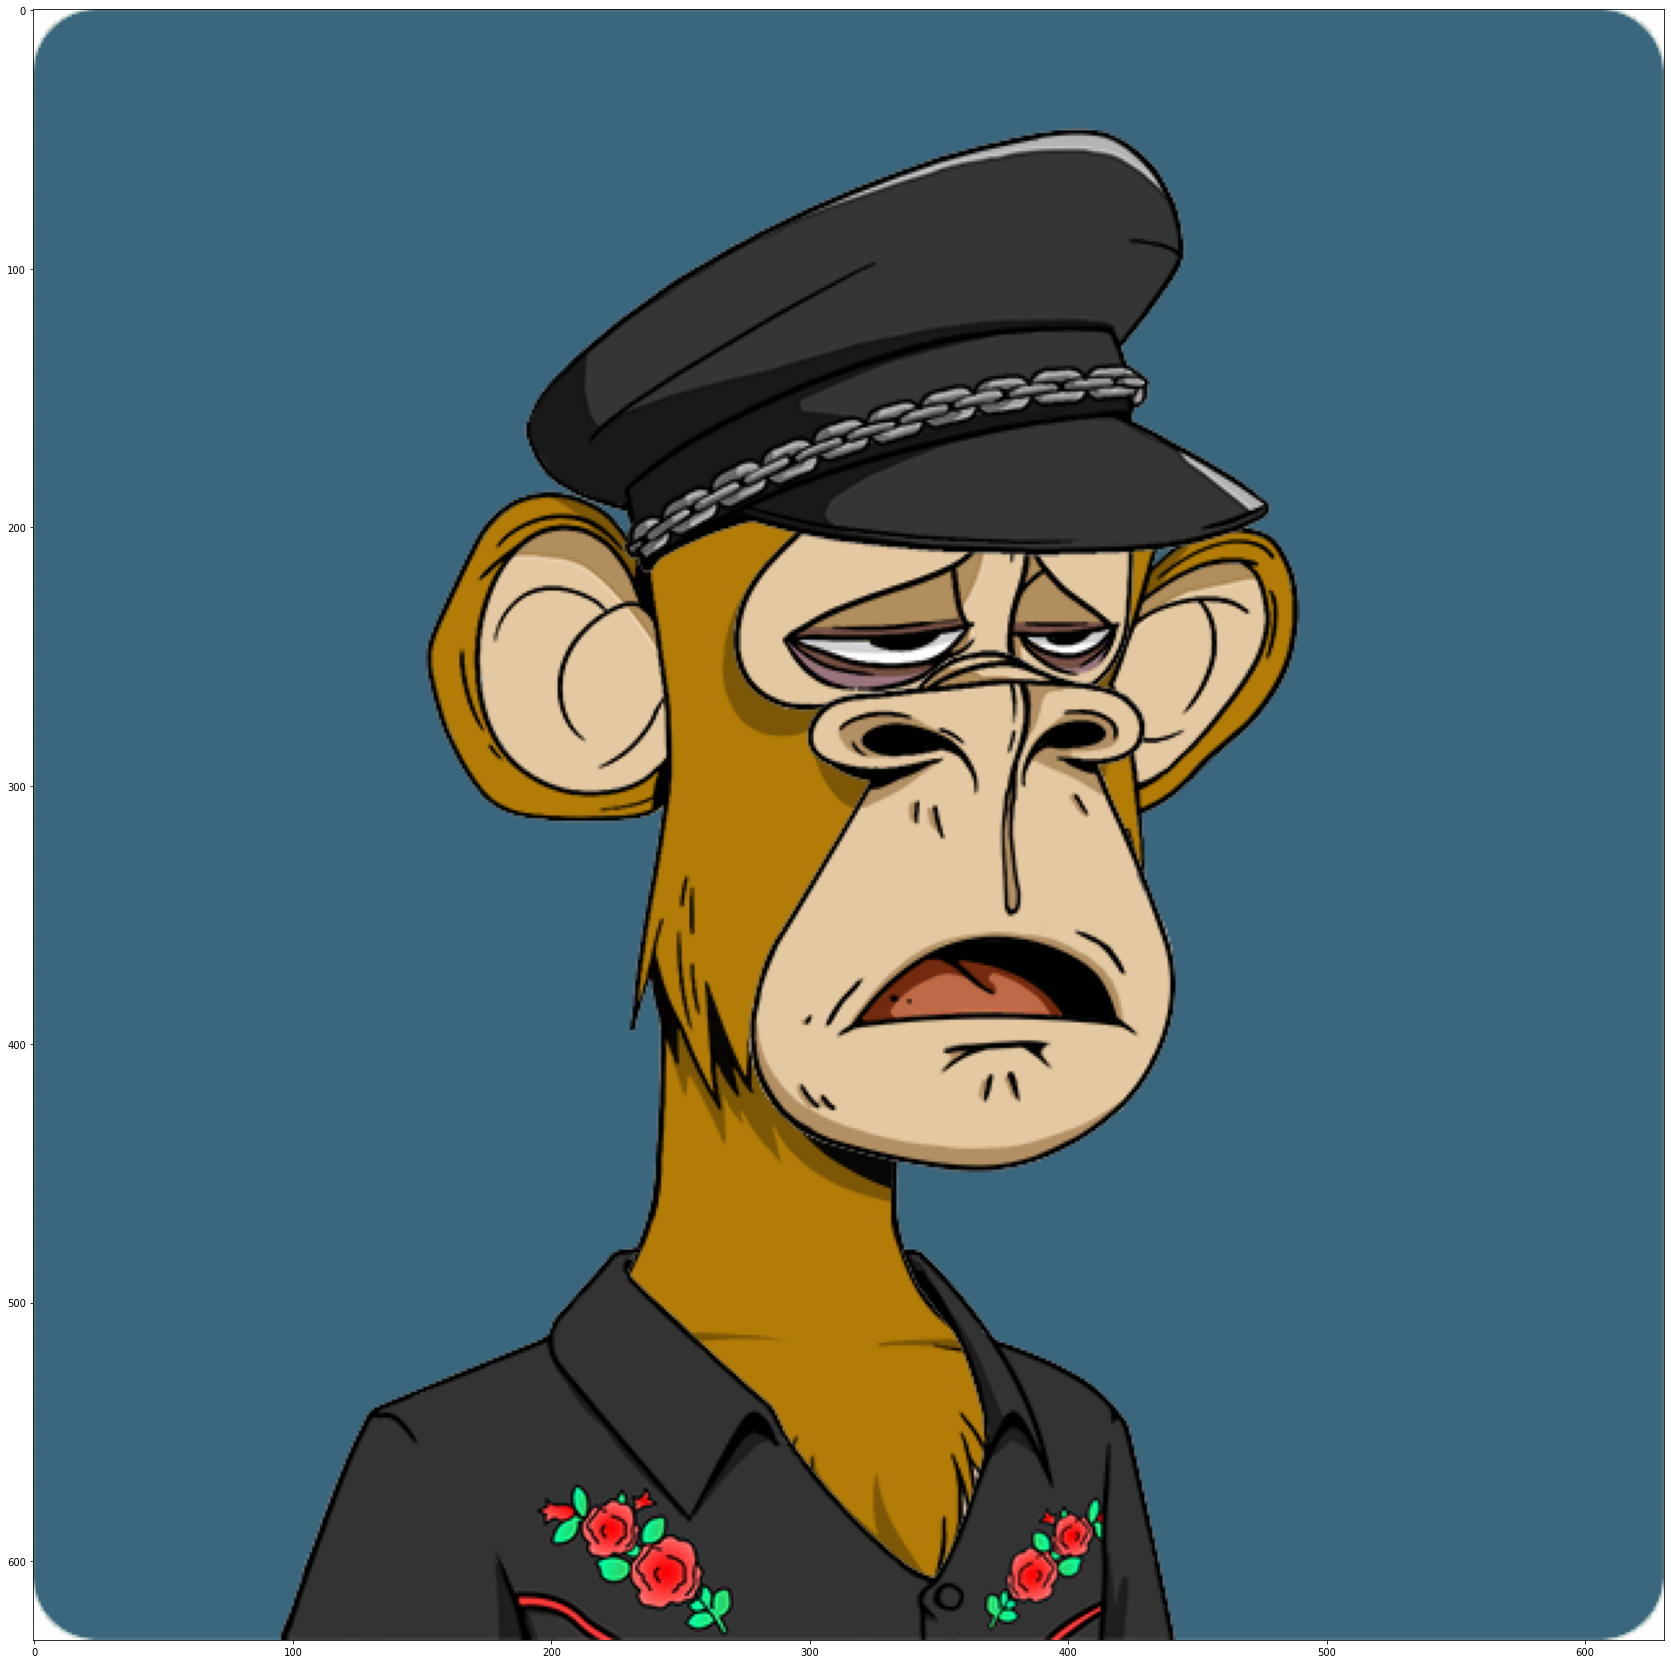

In [ ]:
apes=[img for img in glob.glob("input/bored-apes-yacht-club/bayc/*.png")]

for ape in apes[0:1]:
  img=plt.imread(ape)
  plt.imshow(img)
  plt.show()

In [ ]:
def tensor_imshow(img,dnorm=True):
  img=img.to('cpu')
  npimg=img.detach().numpy()
  if dnorm:
    npimg=npimg*0.5+0.5
  plt.figure(figsize=(3,3))
  plt.axis('off')
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

In [ ]:
def get_dataloader(batch_size,
                   image_size,
                   data_dir=image_dir,
                   num_workers=3):
  stats=(0.5,0.5,0.5), (0.5,0.5,0.5)

  transform=transforms.Compose([transforms.Resize((image_size,image_size)),
                                transforms.ToTensor(),
                                transforms.Normalize(*stats)])
  dataset=datasets.ImageFolder(root=data_dir,
                               transform=transform)
  data_loader=torch.utils.data.DataLoader(dataset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=num_workers,
                                          pin_memory=True)
  return data_loader

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



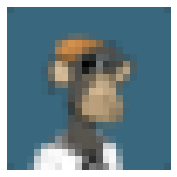

In [ ]:
batch_size,image_size=5,24

train_loader=get_dataloader(batch_size,
                            image_size,
                            image_root)

dataiter=iter(train_loader)

img,_=next(dataiter)
sample_img=img[-1]

tensor_imshow(sample_img)

In [ ]:
class Generator(nn.Module):
  def __init__(self,
               z_dim=100,
               im_chan=3,
               hidden_dim=64):
    super(Generator,self).__init__()
    self.z_dim=z_dim
    self.im_chan=im_chan
    self.hidden_dim=hidden_dim

    self.generator_cnn=nn.Sequential(self.make_gen_block(z_dim,hidden_dim*8, stride=1,padding=0),
                                     self.make_gen_block(hidden_dim*8,hidden_dim*4),
                                     self.make_gen_block(hidden_dim*2,hidden_dim),
                                     self.make_gen_block(hidden_dim,im_chan,final_layer=True))
  def make_gen_block(self,
                     im_chan,
                     op_chan,
                     kernel_size=4,
                     stride=2,
                     padding=1,
                     final_layer=False):
    layers=[]
    layers.append(nn.ConvTranspose2d(im_chan,
                                     op_chan,
                                     kernel_size,
                                     stride,
                                     padding,
                                     bias=False))
    if not final_layer:
      layers.append(nn.BatchNorm2d(op_chan))
      layers.append(nn.LeakyReLU(0.2))
    else:
      layers.append(nn.Tanh())
    return nn.Sequential(*layers)

  def forward(self,noise):
    x=noise.view(-1,self.z_dim,1,1)
    return self.generator_cnn(x)

  def get_noise(n_samples,
                z_dim,
                device='cpu'):
    return torch.randn(n_samples,
                       z_dim,
                       device=device)

In [ ]:
noise=Generator.get_noise(n_samples=5,
                          z_dim=100)
g=Generator(z_dim=100,
            im_chan=3,
            hidden_dim=64)

In [ ]:
print(g)

Generator(
  (generator_cnn): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (2): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (3): Sequential(
      (0): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): Tanh()
    )
  )
)


In [ ]:
class Discriminator(nn.Module):
  def __init__(self,
               im_chan=3,
               conv_dim=64,
               image_size=64):
    super(Discriminator, self).__init__()
    self.image_size=image_size
    self.conv_dim=conv_dim

    self.disc_cnn=nn.Sequential(self.make_disc_block(im_chan, conv_dim),
                                self.make_disc_block(conv_dim,conv_dim*2),
                                self.make_disc_block(conv_dim*2, conv_dim*4),
                                self.make_disc_block(conv_dim*8,1,padding=0,final_layer=True))

  def make_disc_block(self,
                      im_chan,
                      op_chan,
                      kernel_size=4,
                      stride=2,
                      padding=1,
                      final_layer=False):
    layers=[]
    layers.append(nn.ConvTranspose2d(im_chan,
                                     op_chan,
                                     kernel_size,
                                     stride,
                                     padding,
                                     bias=False))
    if not final_layer:
      layers.append(nn.BatchNorm2d(op_chan))
      layers.append(nn.LeakyReLU(0.2,inplace=True))

    return nn.Sequential(*layers)

  def forward(self,image):
    pred=self.disc_cnn(image)
    pred=pred.view(image.size(0),-1)
    return pred

  def _get_final_feature_dimention(self):
    final_width_height=(self.image_size//2**len(slef.disc_cnn))**2
    final_depth=self.conv_diim*2**(len(self.disc_cnn)-1)
    return final_depth*final_width_height

In [ ]:
d=Discriminator(im_chan=3,
                conv_dim=64,
                image_size=64)

In [ ]:
print(d)

Discriminator(
  (disc_cnn): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (1): Sequential(
      (0): ConvTranspose2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (2): Sequential(
      (0): ConvTranspose2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (3): Sequential(
      (0): ConvTranspose2d(512, 1, kernel_size=(4, 4), stride=(2, 2), bias=False)
    )
  )
)


In [ ]:
def weights_init_normal(m):
  if isinstance(m,nn.Conv2d) or isinstance(m,nn.ConvTranspose2d):
    torch.nn.init.normal_(m.weight,0.0,0.02)
  if isinstance(m,nn.BatchNorm2d):
    torch.nn.init.normal_(m.weight,0.0,0.02)
    torch.nn.init.constant_(m.bias,0)

In [ ]:
def real_loss(D_out,device='cpu'):
  criterion=nn.BCEWithLogitsLoss()

  batch_size=D_out.size(0)

  labels=torch.ones(batch_size,device=device)*0.9
  loss=criterion(D_out.squeeze(),labels)
  return loss

In [ ]:
def fake_loss(D_out,device='cpu'):
  criterion=nn.BCEWithLogitsLoss()

  batch_size=D_out.size(0)

  labels=torch.zeros(batch_size,
                     device=device)
  loss=criterion(D_out.squeeze(),labels)
  return loss

In [ ]:
def print_tensor_images(images_tensor):
  plt.rcParams['figure.figsize']=(15,15)
  plt.subplots_adjust(wsapce=0,hspace=0)

  images_tensor=images_tensor.to('cpu')
  npimgs=images_tensor.detach().numpy()

  np_plots=len(images_tensor)

  for idx,image in enumerate(npimgs):
    plt.subplot(1,8,idx+1)
    plt.axis('off')
    plt.imshow(np.transpose(image,(1,2,0)))

  plt.show()

In [ ]:
def train(D,G,
          n_epochs,
          dataloader,
          d_optimizer,
          g_optimizer,
          z_dim,
          print_every=50,
          device='cpu'):
  sample_size=8
  fixed_z=Generator.get_noise(n_samples=sample_size,
                              z_dim=z_dim,
                              device=device)
  for epoch in range(1,n_epochs+1):
    for batch_i,(real_images,_) in enumerate(dataloader):
      batch_size=real_images.size(0)
      real_images=real_images.to(device)

      d_optimizer.zero_grad()
      d_real_op=D(real_images)
      d_real_loss=real_loss(d_real_op,
                          device=device)
      noise=Generator.get_noise(n_samples=batch_size,
                                z_dim=z_dim,
                                device=device)
      fake_images=G(noise)

      d_fake_op=D(fake_images)
      d_fake_loss=fake_loss(d_fake_op,
                            device=device)
      d_loss=d_real_loss+d_fake_loss
      d_loss.backward()
      d_optimizer.step()

      g_optimizer.zero_grad()
      noise=Generator.get_noise(n_samples=batch_size,
                                z_dim=z_dim,
                                device=device)
      g_out=G(noise)
      d_out=D(g_out)

      g_loss=real_loss(d_out,
                       device=device)
      g_loss.bakcward()
      g_optimizer.step()
  print('Epoch [{:5d}/{:5d}] | d_loss:{:6.4f} | g_loss:{:6.4f}'.format(epoch,
                                                                        n_epochs,
                                                                        d_loss.item(),
                                                                        g_loss.item()))
  if (epoch % print_every==0):
    G.eval()
    sample_image=G(fixed_z)
    print_tensor_images(sample_image)
    G.train()

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device is", device)

z_dim=100
beta_1=0.5
beta_2=0.999
lr=0.0002
n_epochs=100
batch_size=128
image_size=64

Device is cuda


In [ ]:
generator=Generator(z_dim,
                    im_chan=3,
                    hidden_dim=64).to(device)
discriminator=Discriminator(im_chan=3,
                            conv_dim=64,
                            image_size=image_size).to(device)
g_optimizer=optim.Adam(generator.parameters(),
                       lr=lr,
                       betas=(beta_1,beta_2))
d_optimizer=optim.Adam(discriminator.parameters(),
                       lr=lr,
                       betas=(beta_1,beta_2))
dataloader=get_dataloader(batch_size,
                          image_size,
                          image_root)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



In [ ]:
%time
n_epochs=50
train(discriminator,
      generator,
      n_epochs,
      dataloader,
      d_optimizer,
      g_optimizer,
      z_dim,
      print_every=10,
      device=device)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



RuntimeError: ignored